In [1]:
import numpy as np
a = np.arange(0, 10, 0.5)
print(len(a), a) # 0 ~ 10 까지 0.5 간격으로 값 생성
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [2]:
# data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측
X, y = [], []
for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])
print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [3]:
# 신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
print(X.shape)
print(y.shape)

(17, 3, 1)
(17, 1)


In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
np.random.seed(0)
model = Sequential()
# units 출력 노드수
model.add(SimpleRNN(units=10, input_shape=(3, 1)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

In [5]:
history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7146
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6705
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6310
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5956
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5634
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5344
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5082
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4856
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4688
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4532
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4387
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4252
Epoch 13/1000
1/1 [==============================

In [6]:
model.evaluate(X, y)

1/1 [==============================] - 0s 211ms/step - loss: 0.0013


0.0013346864143386483

1/1 [==============================] - 0s 162ms/step


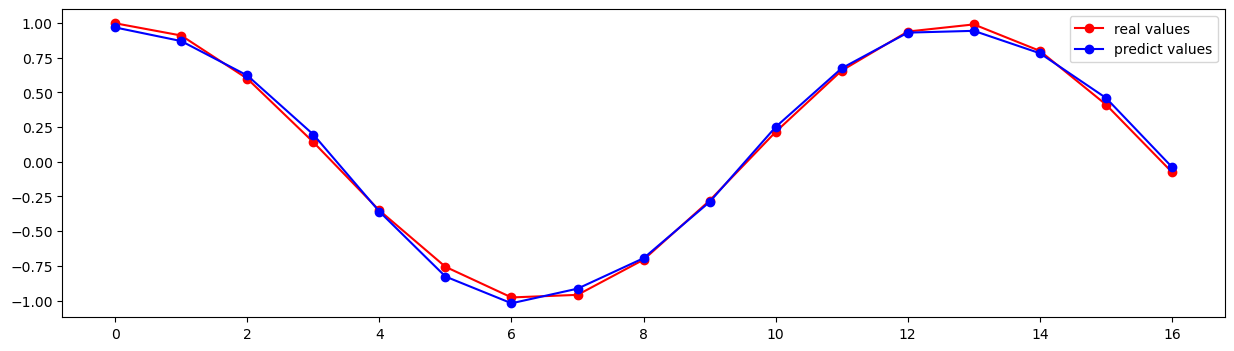

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 4))
plt.plot(data[3:], 'ro-', label='real values') # 실제값
plt.plot(model.predict(X), 'bo-', label='predict values')
plt.legend()
plt.show()

In [8]:
from datetime import datetime
import tensorflow as tf
logdir = "d:/workspace/Python2/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

'd:/workspace/Python2/logs/20230508-155127'

In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X, y, epochs=1000, callbacks=[tensorboard_callback])
# tensorboard --logdir=d:/workspace/Python2/logs/20230508-155127

Epoch 1/1000
1/1 [==============================] - 0s 88ms/step - loss: 0.0013
Epoch 2/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0013
Epoch 3/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0013
Epoch 4/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0013
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0013
Epoch 6/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0013
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0013
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 9/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0013
Epoch 10/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013
Epoch 11/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0013
Epoch 12/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0013
Epoch 13/1000
1/1 [==================